#0. Import Library

In [0]:
!pip uninstall tensorflow

!pip install tensorflow==1.13.2

  Using cached https://files.pythonhosted.org/packages/db/d3/651f95288a6cd9094f7411cdd90ef12a3d01a268009e0e3cd66b5c8d65bd/tensorflow-1.13.2-cp36-cp36m-manylinux1_x86_64.whl


In [0]:
!pip show tensorflow

Name: tensorflow
Version: 1.13.2
Summary: TensorFlow is an open source machine learning framework for everyone.
Home-page: https://www.tensorflow.org/
Author: Google Inc.
Author-email: opensource@google.com
License: Apache 2.0
Location: /usr/local/lib/python3.6/dist-packages
Requires: absl-py, keras-applications, termcolor, gast, grpcio, keras-preprocessing, numpy, six, tensorflow-estimator, wheel, tensorboard, astor, protobuf
Required-by: fancyimpute


In [0]:
# tenserflow sebagai deep learning proses
import tensorflow as tf 
from tensorflow.contrib import rnn
import numpy as np # untuk mendefinisikan array
import pandas as pd # untuk mendefinisikan dataframe agar lebih complex
import time # waktu
# metplotlib sebagai ploting data
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
%matplotlib inline
mpl.style.use( 'ggplot' ) # style Plot dari matplotlib tsb

/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:529: FutureWarning: Passing (type, 1) or 

#1. Mengenal Data

In [0]:
# Import MNIST data
from tensorflow.examples.tutorials.mnist import input_data
# mnist = input_data.read_data_sets("/tmp/data/", one_hot=True)
mnist = input_data.read_data_sets('data/fashion', one_hot=True) # membaca dataset dari input_data yang berada apada tensorflow.examples.tutorial.mnist


Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting data/fashion/train-images-idx3-ubyte.gz
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting data/fashion/train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Extracting data/fashion/t10k-images-idx3-ubyte.gz
Extracting data/fashion/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.


In [0]:
!mkdir data/fashion # membuat sebuah directory dalam input_data yang bernama "data/fashion"
!wget -O data/fashion/train-images-idx3-ubyte.gz http://fashion-mnist.s3-website.eu-central-1.amazonaws.com/train-images-idx3-ubyte.gz
!wget -O data/fashion/train-labels-idx1-ubyte.gz http://fashion-mnist.s3-website.eu-central-1.amazonaws.com/train-labels-idx1-ubyte.gz
!wget -O data/fashion/t10k-images-idx3-ubyte.gz http://fashion-mnist.s3-website.eu-central-1.amazonaws.com/t10k-images-idx3-ubyte.gz
!wget -O data/fashion/t10k-labels-idx1-ubyte.gz http://fashion-mnist.s3-website.eu-central-1.amazonaws.com/t10k-labels-idx1-ubyte.gz

mkdir: cannot create directory ‘data/fashion’: File exists
--2020-04-04 17:05:39--  http://fashion-mnist.s3-website.eu-central-1.amazonaws.com/train-images-idx3-ubyte.gz
Resolving fashion-mnist.s3-website.eu-central-1.amazonaws.com (fashion-mnist.s3-website.eu-central-1.amazonaws.com)... 52.219.75.16
Connecting to fashion-mnist.s3-website.eu-central-1.amazonaws.com (fashion-mnist.s3-website.eu-central-1.amazonaws.com)|52.219.75.16|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 26421880 (25M) [binary/octet-stream]
Saving to: ‘data/fashion/train-images-idx3-ubyte.gz’

data/fashion/train- 100%[===================>]  25.20M  11.7MB/s    in 2.2s    

2020-04-04 17:05:41 (11.7 MB/s) - ‘data/fashion/train-images-idx3-ubyte.gz’ saved [26421880/26421880]

--2020-04-04 17:05:43--  http://fashion-mnist.s3-website.eu-central-1.amazonaws.com/train-labels-idx1-ubyte.gz
Resolving fashion-mnist.s3-website.eu-central-1.amazonaws.com (fashion-mnist.s3-website.eu-central-1.amazo

In [0]:
# Import Fashion MNIST
mnist = input_data.read_data_sets('data/fashion', one_hot=True) # memanggil sebuah data pada dataset untuk mengextrak data

Extracting data/fashion/train-images-idx3-ubyte.gz
Extracting data/fashion/train-labels-idx1-ubyte.gz
Extracting data/fashion/t10k-images-idx3-ubyte.gz
Extracting data/fashion/t10k-labels-idx1-ubyte.gz



> Membaca dataset fashion mnist





In [0]:
print(f'image training: { mnist.train.images.shape}')
print(f'label training: { mnist.train.labels.shape}')
print(f'image testing: { mnist.test.images.shape}')
print(f'label testing: { mnist.test.labels.shape}')


image training: (55000, 784)
label training: (55000, 10)
image testing: (10000, 784)
label testing: (10000, 10)


In [0]:
print(mnist.train.images[40]) #membaca data images ke 40

[0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         

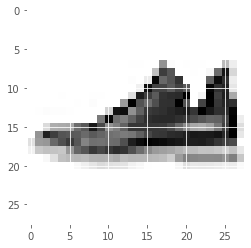

In [0]:
sample_1 = mnist.train.images[40].reshape(28,28) # untuk memanggil image ke 40 dengan ukuran pixel 28x28
plt.imshow(sample_1, cmap='Greys') #menampilkan inputan dari variable sample_i dengan memberikan warna abu-abu

In [0]:
datatrainimages=pd.DataFrame(mnist.train.images) # untuk meengubah data dari numpy ke data frame pandas
datatestimages=pd.DataFrame(mnist.test.images)
combine = [datatrainimages, datatestimages] 
ffmnist = pd.concat(combine)
print(ffmnist)
print(ffmnist.isnull().any().sum()) # untuk menghitung jumlah data yang kosong 

      0    1    2    3    4    5    ...       778       779       780  781  782  783
0     0.0  0.0  0.0  0.0  0.0  0.0  ...  0.498039  0.490196  0.298039  0.0  0.0  0.0
1     0.0  0.0  0.0  0.0  0.0  0.0  ...  0.000000  0.000000  0.000000  0.0  0.0  0.0
2     0.0  0.0  0.0  0.0  0.0  0.0  ...  0.000000  0.000000  0.000000  0.0  0.0  0.0
3     0.0  0.0  0.0  0.0  0.0  0.0  ...  0.000000  0.000000  0.000000  0.0  0.0  0.0
4     0.0  0.0  0.0  0.0  0.0  0.0  ...  0.000000  0.000000  0.000000  0.0  0.0  0.0
...   ...  ...  ...  ...  ...  ...  ...       ...       ...       ...  ...  ...  ...
9995  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.000000  0.000000  0.000000  0.0  0.0  0.0
9996  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.000000  0.000000  0.000000  0.0  0.0  0.0
9997  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.000000  0.000000  0.000000  0.0  0.0  0.0
9998  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.000000  0.000000  0.000000  0.0  0.0  0.0
9999  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.000000  0.000000  0.00

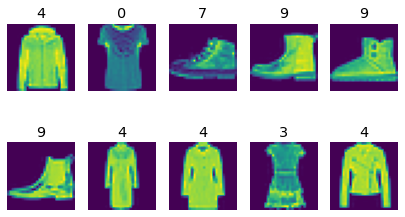

In [0]:
fig, axes = plt.subplots(2, 5, figsize=(7,4))
for img, label, ax in zip(mnist.train.images[0:10], np.argmax(mnist.train.labels[0:10], 1), axes.flat):
  ax.set_title(label)
  ax.imshow(img.reshape(28,28))
  ax.axis('off')
plt.show()

#2. Membangun RNN/LSTM

##2.1. Hyperparameter

In [0]:
# 55000
#hyperparamters
learning_rate = 0.0001
# jumlah perpndaha
training_iterations = 100000
# banyaknya pengulangan
batch_size = 128
# banyaknya jumlah gambar yang diolah dalam sekali pengolahan
display_step = 10
# 
epochs = 1000
# 

n_inputs = 28
# jumlah neuran masukan
n_time_steps = 28
# 
n_hidden_units = 128
# 
n_classes = 10
# 

##2.2. Placeholders

In [0]:
X = tf.placeholder(tf.float32, [None, n_time_steps, n_inputs])
# X = tf.placeholder(tf.float32, [batch_size, n_time_steps, n_inputs])
Y = tf.placeholder(tf.float32, [None, n_classes])
X

<tf.Tensor 'Placeholder:0' shape=(?, 28, 28) dtype=float32>

##2.3. Variable

In [0]:
output_w = tf.Variable(tf.random_normal([n_hidden_units, n_classes]))
output_b = tf.Variable(tf.random_normal([n_classes]))
output_w

Instructions for updating:
Colocations handled automatically by placer.


<tf.Variable 'Variable:0' shape=(128, 10) dtype=float32_ref>

##2.4. Menyiapkan dan Membangun RNN/LSTM

In [0]:
lstm_cell = tf.contrib.rnn.BasicLSTMCell(n_hidden_units, forget_bias=1)
outputs, final_state = tf.nn.dynamic_rnn(lstm_cell, X, dtype="float32")
outputs

Instructions for updating:
This class is equivalent as tf.keras.layers.LSTMCell, and will be replaced by that in Tensorflow 2.0.
Instructions for updating:
Please use `keras.layers.RNN(cell)`, which is equivalent to this API


<tf.Tensor 'rnn/transpose_1:0' shape=(?, 28, 128) dtype=float32>

In [0]:
outputs[:,-1,:]

<tf.Tensor 'strided_slice:0' shape=(?, 128) dtype=float32>

In [0]:
# a = np.array([[[1,2,3], [4,5,6], [7,8,9]], [[10,11,12], [13,14,15], [16,17,18]], [[19,20,21], [22,23,24], [25,26,27]]]) # menyimpan hasil pixel image 28 x 28
# a

In [0]:
# a[:,-1,:]

##2.5. Memprediksi

In [0]:
logits = tf.matmul(outputs[:,-1,:], output_w) + output_b #(outputs[:,-1,:]*output_w) + output_b 
logits

<tf.Tensor 'add:0' shape=(?, 10) dtype=float32>

##2.6. Loss dan Optimasi

In [0]:
loss = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(labels=Y, logits=logits )) #mencari jumlah rata rata dari cross and tropy dari label = y dan logits

optimize = tf.train.AdamOptimizer(learning_rate=learning_rate).minimize(loss) # pengoptimasikan leartning_rate dengan jumlah lose menggunakan AdamOptimizer
# optimize = tf.train.GradientDescentOptimizer(learning_rate=learning_rate).minimize(loss) 
# opsi lainnya

Instructions for updating:

Future major versions of TensorFlow will allow gradients to flow
into the labels input on backprop by default.

See `tf.nn.softmax_cross_entropy_with_logits_v2`.



##2.7. Metric untuk evaluasi

In [0]:
# pembuatan konfusion matrik yang digunakan untuk mengoptimasikan
confusion_op = tf.math.confusion_matrix(tf.argmax(Y, 1), tf.argmax(logits, 1)) 
correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(Y, 1)) 
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

Instructions for updating:
Use tf.cast instead.
Instructions for updating:
Use tf.cast instead.


#3. Training

In [0]:
timestart=time.time()
# insialisasi variable
init = tf.global_variables_initializer()
graph=[]

# inisialisasi seasino(untuk menjalankan graph)
session = tf.Session()
session.run(init)

for epoch in range(epochs):
  # mengambil gambar gambar dalam batch
  batch_x, batch_y = mnist.train.next_batch(batch_size = batch_size)
  
  # reshape, karena gambarnya masih dalam bentuk vektor
  batch_x2 = batch_x.reshape((batch_size, n_time_steps, n_inputs))
  
  session.run(optimize, feed_dict={X: batch_x2, Y: batch_y})
  
  if not epoch % 10: # hanya menampilkan stap ke 10
    
    acc = session.run(accuracy, feed_dict={X: batch_x2, Y: batch_y})
    los = session.run(loss, feed_dict={X: batch_x2, Y: batch_y})
    graph.append([epoch,acc,los]) # graph menyimpan sebuah data dari epoch,acc dan loss untuk digunakan pada ploting
    print(f'epoch: {epoch}, loss: {los:.4f}, accuracy: {acc:.4f}')
    # print(graph)
    
  if epoch==(epochs-1):
    
    output_val = np.array(session.run(outputs, feed_dict={X: batch_x2}))
    finalstate_val = np.array(session.run(final_state, feed_dict={X: batch_x2}))
timestop=time.time()

epoch: 0, loss: 3.0840, accuracy: 0.0781
epoch: 10, loss: 2.6520, accuracy: 0.2031
epoch: 20, loss: 2.2676, accuracy: 0.1797
epoch: 30, loss: 1.9903, accuracy: 0.2891
epoch: 40, loss: 1.8446, accuracy: 0.3203
epoch: 50, loss: 1.7605, accuracy: 0.3125
epoch: 60, loss: 1.6498, accuracy: 0.3594
epoch: 70, loss: 1.5469, accuracy: 0.3828
epoch: 80, loss: 1.3638, accuracy: 0.4844
epoch: 90, loss: 1.4028, accuracy: 0.5078
epoch: 100, loss: 1.4459, accuracy: 0.4219
epoch: 110, loss: 1.2416, accuracy: 0.5469
epoch: 120, loss: 1.1604, accuracy: 0.5391
epoch: 130, loss: 1.2370, accuracy: 0.6016
epoch: 140, loss: 1.0216, accuracy: 0.6641
epoch: 150, loss: 0.9737, accuracy: 0.6406
epoch: 160, loss: 0.9361, accuracy: 0.6953
epoch: 170, loss: 0.8840, accuracy: 0.7109
epoch: 180, loss: 0.8160, accuracy: 0.7422
epoch: 190, loss: 1.0193, accuracy: 0.6797
epoch: 200, loss: 0.8986, accuracy: 0.6797
epoch: 210, loss: 0.7462, accuracy: 0.7656
epoch: 220, loss: 0.8142, accuracy: 0.7500
epoch: 230, loss: 0.69

In [0]:
print(timestop-timestart) # menampilkan waktu proses training

71.99485445022583


#4. Evaluasi

In [0]:
confusion = session.run(confusion_op, feed_dict={X: mnist.test.images.reshape(10000, n_time_steps, n_inputs), Y: mnist.test.labels})
print(confusion)

[[735   4  21  94   8   6 112   1  19   0]
 [  2 936  14  38   8   0   1   0   1   0]
 [  8   1 666  14 172   1 129   0   9   0]
 [ 26  17   3 855  36   0  58   0   4   1]
 [  0   3 112  45 727   3 107   0   3   0]
 [  0   0   0   2   0 875   0  76  16  31]
 [129   3 133  79 129   7 495   0  25   0]
 [  0   0   0   0   0  34   0 906   3  57]
 [  0   1  12  12   1   6  14   7 947   0]
 [  1   0   0   0   1  25   0  76   2 895]]


In [0]:
from sklearn.metrics import classification_report

yhat = session.run(logits, feed_dict={X: mnist.test.images.reshape(10000, n_time_steps, n_inputs)})
yhat = np.argmax(yhat, axis=1)

y = session.run(Y, feed_dict={Y: mnist.test.labels})
y = np.argmax(y, axis=1)

print(classification_report(y, yhat))

              precision    recall  f1-score   support

           0       0.82      0.73      0.77      1000
           1       0.97      0.94      0.95      1000
           2       0.69      0.67      0.68      1000
           3       0.75      0.85      0.80      1000
           4       0.67      0.73      0.70      1000
           5       0.91      0.88      0.89      1000
           6       0.54      0.49      0.52      1000
           7       0.85      0.91      0.88      1000
           8       0.92      0.95      0.93      1000
           9       0.91      0.90      0.90      1000

    accuracy                           0.80     10000
   macro avg       0.80      0.80      0.80     10000
weighted avg       0.80      0.80      0.80     10000



In [0]:
# untuk menampilkan data presentasi dari setiap data test
i=0 
presentasi_data = session.run(logits, feed_dict={X: mnist.test.images.reshape(10000, n_time_steps, n_inputs)})
while i < len(y):
  print ("Data test ke",i)
  print (y[i],yhat[i])
  print (presentasi_data[i])
  i=i+1

Streaming output truncated to the last 5000 lines.
7 9
[-4.1279945  -9.967013   -9.430691   -6.101778   -7.1951876   3.4194684
 -4.4955072   7.0612288  -0.53091586  9.293146  ]
Data test ke 8755
0 0
[ 4.8746696   0.5272612   1.5792364   3.815902    0.7077553  -1.782023
  4.268139   -6.5609937  -0.79700005 -8.798088  ]
Data test ke 8756
6 0
[  5.787118    1.7480862   3.2669148   4.659378    2.3020837  -4.2179756
   5.646268   -7.737454    0.1346463 -10.9280205]
Data test ke 8757
1 0
[ 4.9835787  3.4555316  1.6505395  4.3800764  2.861858  -3.6250198
  3.6930356 -5.9427395  0.8617167 -8.339899 ]
Data test ke 8758
2 4
[ -2.130299    -0.75449944   5.357384     1.5442774    7.856258
  -8.496271     5.952132    -4.826098     3.1347985  -11.778419  ]
Data test ke 8759
0 0
[  7.5534663   -0.23021531   2.2351685    3.5334976   -0.09213722
  -2.430439     6.113403    -8.705979     1.3038858  -11.078928  ]
Data test ke 8760
0 0
[  7.579939   -1.7568486   1.7345427   3.6159246  -1.53716    -3.38336

In [0]:
target_dict = {
 0: 'T-shirt/top',
 1: 'Trouser',
 2: 'Pullover',
 3: 'Dress',
 4: 'Coat',
 5: 'Sandal',
 6: 'Shirt',
 7: 'Sneaker',
 8: 'Bag',
 9: 'Ankle boot',
}

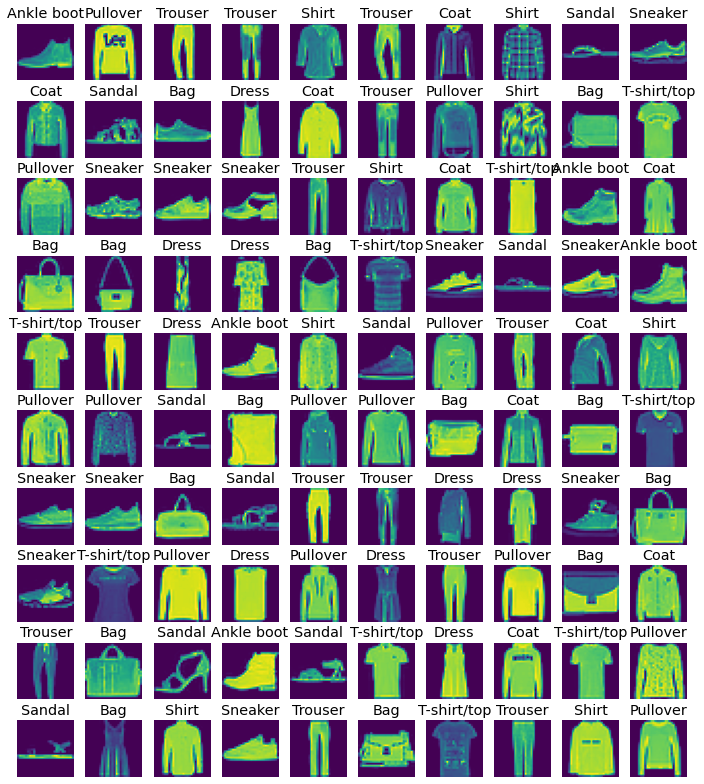

In [0]:
fig, axes = plt.subplots(10, 10, figsize=(12,14))
for img, label, ax in zip(mnist.test.images[0:100], yhat, axes.flat):
  ax.set_title(target_dict[label])
  ax.imshow(img.reshape(28,28))
  ax.axis('off')
plt.show()

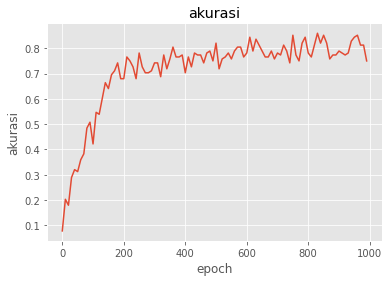

In [0]:
# plot antara epoch dan akurasi
sumbux=[item[0] for item in graph]
sumbuy=[item[1] for item in graph]
# print(sumbuy)
plt.plot(sumbux, sumbuy)
plt.yscale('linear')
plt.title('akurasi')
plt.xlabel('epoch')
plt.ylabel('akurasi')
plt.axis('auto')
plt.grid(True)

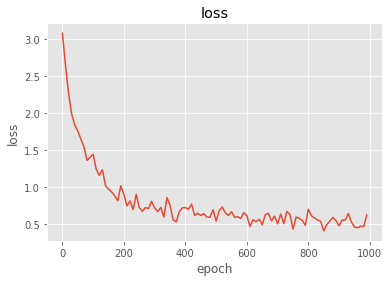

In [0]:
# plot antara epoch dan loss
sumbux=[item[0] for item in graph]
sumbuy=[item[2] for item in graph]
plt.plot(sumbux, sumbuy)
# print(sumbuy)
plt.yscale('linear')
plt.title('loss')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.axis('auto')
plt.grid(True)